# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 1**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

**Objektif**

+ memahami konsep Clustering dengan menggunakan Scikit-Learn
+ mempersiapkan data untuk digunakan dalam Clustering
+ mengimplementasikan Clustering pada data yang diberikan

**Problem**

Sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. <br>
This case requires to develop a customer segmentation to define marketing strategy.

------

**Dict**

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [3]:
pd.options.display.max_columns = None 

In [4]:
df = pd.read_csv("card_transdata.csv")

In [5]:
df.shape

(1000000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Dataset yang diolah mempunyai bentuk ***8950 Baris dan 18 Kolom*** <br> 
Terdapat *missing value* pada dataset. handling *missing value* diperlukan pada tahap preprocessing

In [7]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [8]:
#cek sebarang missing value
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Ditemukan sebanyak **313** Missing value pada Kolom ***MINIMUM_PAYMENTS*** 

Ditemukan sebanyak **1** Missing value pada Kolom ***CREDIT_LIMIT*** 

---

In [9]:
df_cop = df.copy()

membuat copy dataset yang nantinya akan digunakan dalam proses split train-set

In [10]:
df_cop1 = df_cop.copy()

copy lain dari dataset untuk EDA 

---

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [12]:
df_cop1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_cop1.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [14]:
num_eda = df_cop1[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
cat_eda = df_cop1[['used_chip','used_pin_number','online_order','repeat_retailer','fraud']]

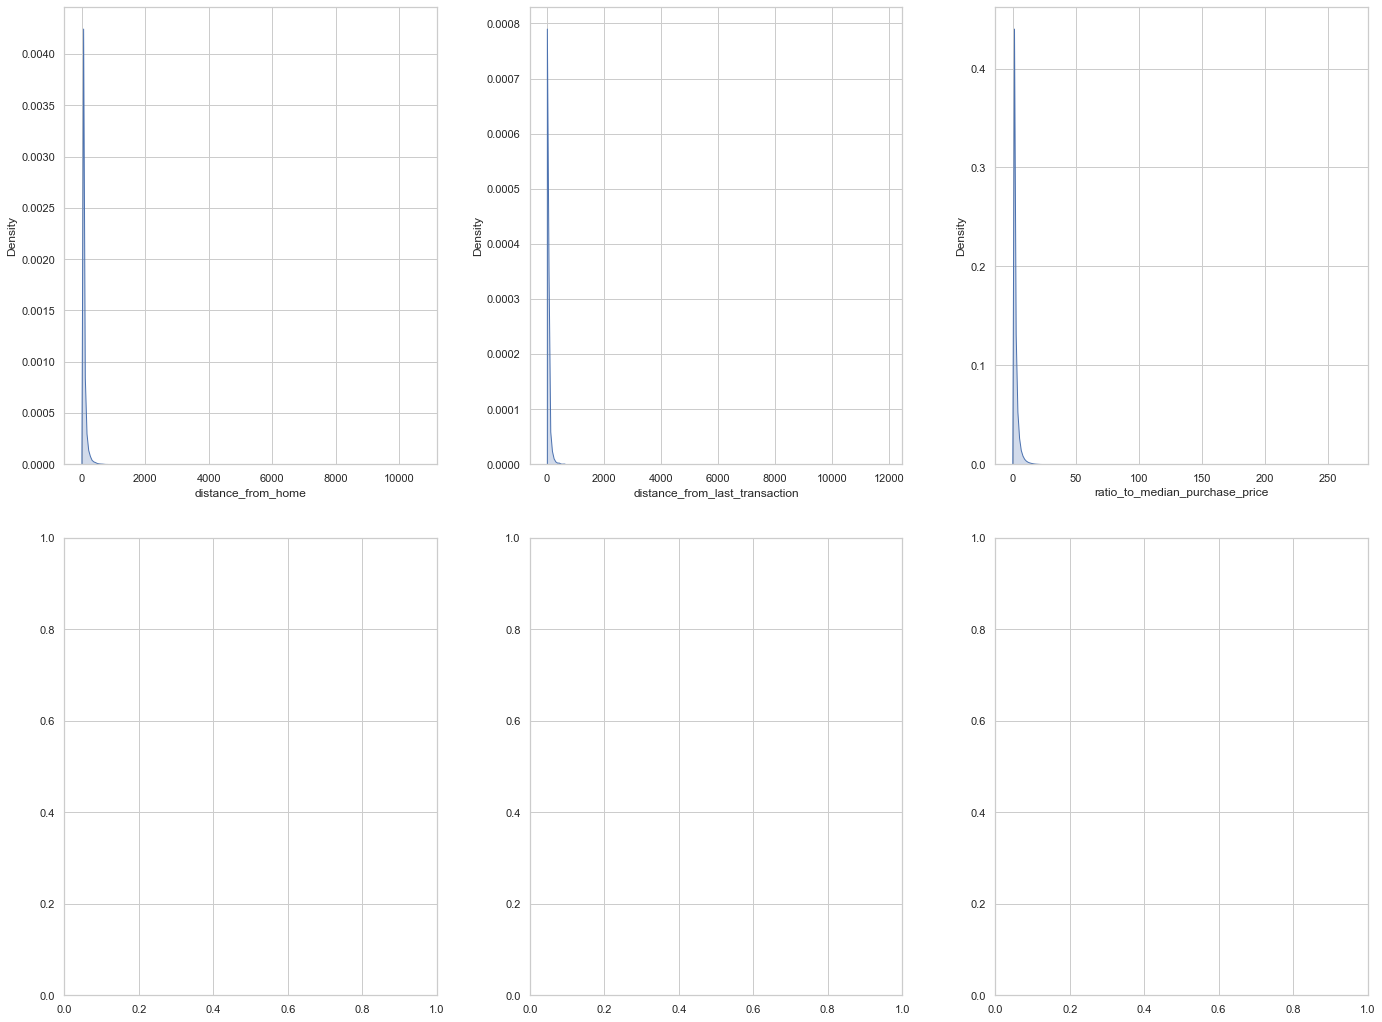

In [35]:
sns.set_theme(style="whitegrid")
figeda, axeseda = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
i = 0
j = 0

for col in num_eda.columns:
    sns.kdeplot(data=num_eda, x=col, fill=True, ax=axeseda[i][j])
    j += 1
    if j > 3:
        j = 0
        i += 1
    if i == 1:
        break
figeda.tight_layout(pad=3.0)

Berdasarkan pengelompokan numerical Data yang sudah dilakukan, dapat kita ambil kesimpulan berupa : 

+ Semua data yang kita kelompokan tadi memiliki distribusi skew
+ Hampir semua kolom memiliki outliers

---

In [16]:
cat_eda

,used_chip,used_pin_number,online_order,repeat_retailer,fraud
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
999995,1.0,0.0,0.0,1.0,0.0
999996,1.0,0.0,0.0,1.0,0.0
999997,1.0,0.0,1.0,1.0,0.0
999998,0.0,0.0,1.0,1.0,0.0


Jika dilihat value datanya, beberapa kolom diatas bentuknya binnary. Maka bisa diasumsikan bahwa data diatas merupakan data kategorik yang di Numerik. 

---

**Kita akan cari tau ciri-ciri CC yang terbukti fraud**

In [50]:
uc = df_cop1.groupby(by=['used_chip','fraud']).size().reset_index(name='count')

In [47]:
uc_f = uc[uc['fraud']==1][['used_chip','count']]
uc_f['used_chip'].replace({1:'With Chip',0:'No Chip'},inplace=True)

In [49]:
figuc = px.pie(uc_f, values='count', names='used_chip', title='Transaksi Fraud yang menggunakan Kartu Chip')
figuc.update_traces(textposition='outside', textinfo='percent+label')
figuc.show()

Bisa dilihat, untuk kasus Fraud yang terbukti 'Yes', ternyata lebih dari 70% **Credit Cardnya Tanpa Chip**. ini membuktikan, bahwa Chip mampu mengurangi Resiko terjadinya Fraud Credit Card

---

In [53]:
upn = df_cop1.groupby(by=['used_pin_number','fraud']).size().reset_index(name='count')
upn_f = upn[upn['fraud']==1][['used_pin_number','count']]
upn_f['used_pin_number'].replace({1:'With Pin',0:'No Pin'},inplace=True)

In [55]:
figupn = px.pie(upn_f, values='count', names='used_pin_number', title='Transaksi Fraud yang menggunakan Pin Number')
figupn.update_traces(textposition='outside', textinfo='percent+label')
figupn.show()

Hampir semua kasus Fraud yang terjadi, Credit Cardnya **tidak memiliki Pin Number**. 

---

In [57]:
od = df_cop1.groupby(by=['online_order','fraud']).size().reset_index(name='count')
od_f = od[od['fraud']==1][['online_order','count']]
od_f['online_order'].replace({1:'Online Order',0:'Offline Order'},inplace=True)

In [58]:
figod = px.pie(od_f, values='count', names='online_order', title='Transaksi Fraud yang menggunakan Order Online')
figod.update_traces(textposition='outside', textinfo='percent+label')
figod.show()

Presentase Fraud terjadi **hampir semua case** nya dilakukan dengan cara **Online Order / Online Shopping**. 

---

In [59]:
rt = df_cop1.groupby(by=['repeat_retailer','fraud']).size().reset_index(name='count')
rt_f = rt[rt['fraud']==1][['repeat_retailer','count']]
rt_f['repeat_retailer'].replace({1:'Repeat Retailer',0:'New Retailer'},inplace=True)

In [61]:
figrt = px.pie(rt_f, values='count', names='repeat_retailer', title='Transaksi Fraud Dari Tempat Retailer')
figrt.update_traces(textposition='outside', textinfo='percent+label')
figrt.show()

Ternyata Kasus yang terjadi, Lebih dari 80% dilakukan di **Tempat Retailer yang sama**. 

---

Kesimpulan dari EDA awal : 

**Numerical Kolom :** 

+ Semua data yang kita kelompokan tadi memiliki distribusi skew
+ Hampir semua kolom memiliki outliers

**Kategorical Kolom :** 

Ciri-Ciri CC yang Terbukti Menggunakan Fraud : 

+ No Chip 
+ No Pin 
+ Mayoritas dilakukan secara Online 
+ DIlakukan ditempat Retailer yang sama 


----

<AxesSubplot:>

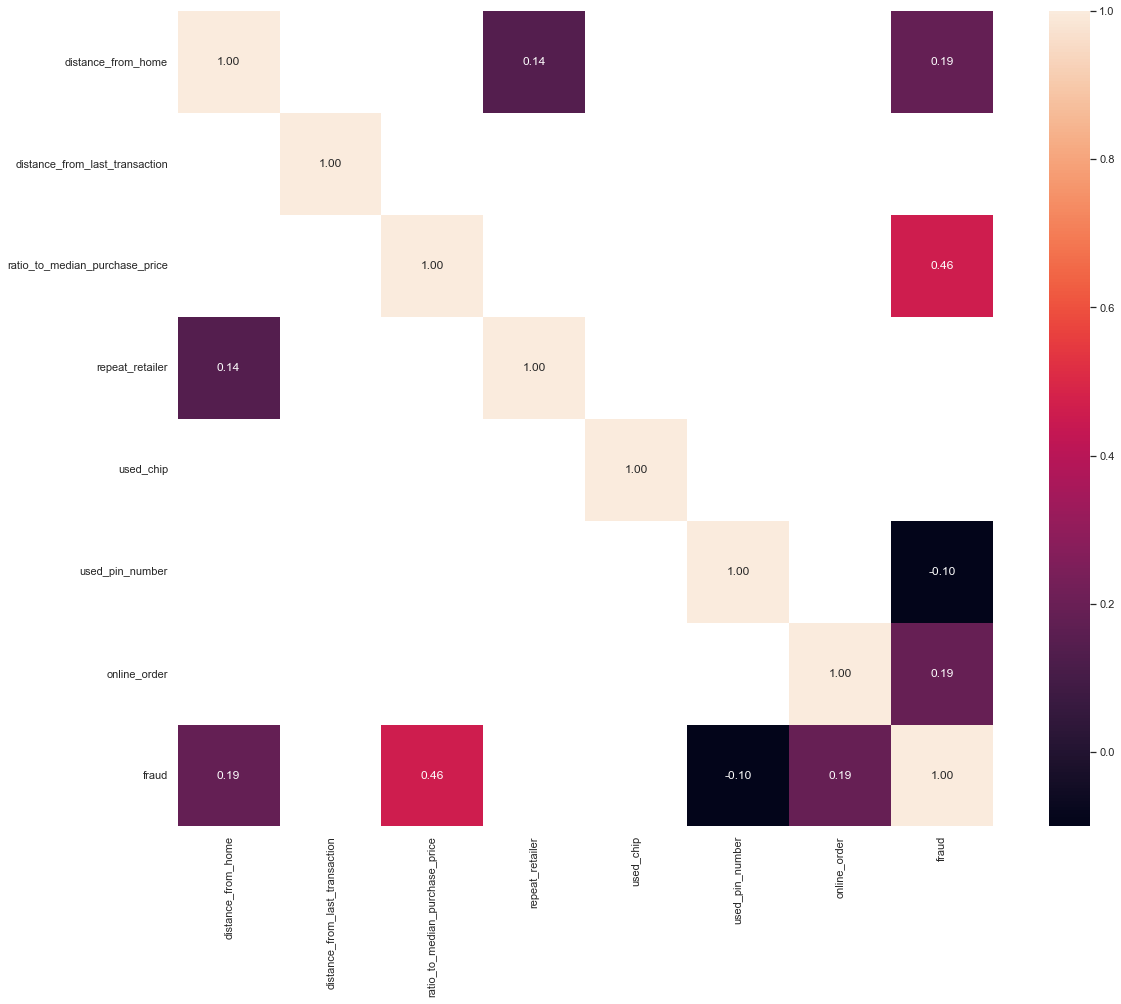

In [ ]:
corr_matrox = df_cop1.corr()
# corr_matrox.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrox[(corr_matrox >= 0.1) | (corr_matrox <= -0.1)], square=True, annot=True, fmt='.2f')

Jika dilihat dari korelasinya, ternyata dari Ciri-Ciri yang kita lihat pada EDA, nampak Kecil Korelasinya jika dibandingkan dengan Kolom yang lain.

----

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [64]:
data_inf = df_cop.sample(1000, random_state=36)
data_inf

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
406351,11.530257,2.416797,2.101379,1.0,0.0,0.0,1.0,0.0
905608,4.386394,0.030958,0.611166,1.0,0.0,0.0,1.0,0.0
530780,3.096676,6.690919,0.175205,1.0,1.0,0.0,0.0,0.0
194386,2.909545,0.307446,2.177599,1.0,1.0,0.0,1.0,0.0
716430,4.076393,1.983399,1.942259,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
447723,98.041612,5.669495,0.615789,1.0,0.0,0.0,1.0,0.0
838701,3.707942,20.501928,45.216575,1.0,0.0,0.0,1.0,1.0
524018,1.545570,0.152530,0.886325,0.0,1.0,0.0,1.0,0.0
514884,4.756816,1.034789,2.624253,1.0,1.0,0.0,0.0,0.0


In [65]:
#drop index data inf dari dataset yang ada

data_train = df_cop.drop(data_inf.index)
data_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [66]:
#reset index terhadap data train test

data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [67]:
data_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
998995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
998996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
998997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
998998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


num_eda = df_cop1[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
cat_eda = df_cop1[['used_chip','used_pin_number','online_order','repeat_retailer','fraud']]

In [ ]:
num_train = data_train[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']].columns.tolist()
cat_train = data_train[['used_chip','used_pin_number','online_order','repeat_retailer','fraud']].columns.tolist()

#### **Outlier**

In [ ]:
def diagnostic_plots(data_train, column):
    #define the figure
    plt.figure(figsize=(15,5))

    #plot the histogram
    plt.subplot(1,2,1)
    sns.histplot(data_train[column], bins=18)
    plt.title('Histogram')

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_train[column])
    plt.title('Boxplot')

    #show the plot
    plt.show()


In [ ]:
def distribution_features(data_train, column):
    for column in column:
        print(column)
        print('Distribution:', data_train[column].skew())
        print('Kurtosis:', data_train[column].kurt())
        print('\n')

        if data_train[column].skew() < 0.5 and data_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif data_train[column].skew() < -1 or data_train[column].skew() > 1:
            print('Highly Skewed')
        elif data_train[column].skew() >= -0.5 or data_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
            
        diagnostic_plots(data_train, column) 


---

BALANCE
Distribution: 2.3928897219568444
Kurtosis: 7.669448601305978


Highly Skewed


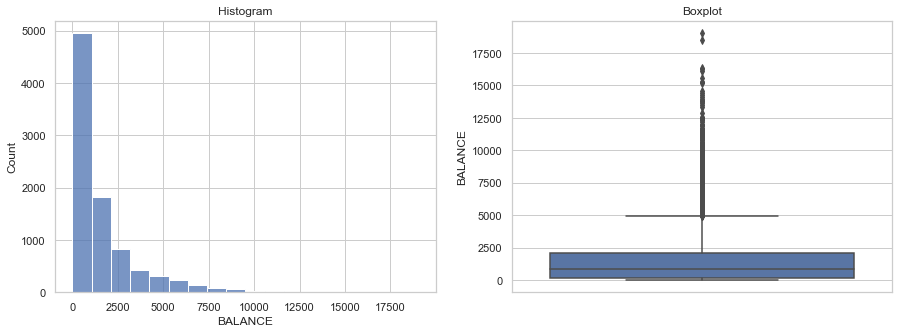

PURCHASES
Distribution: 8.146766029160734
Kurtosis: 111.40530330549097


Highly Skewed


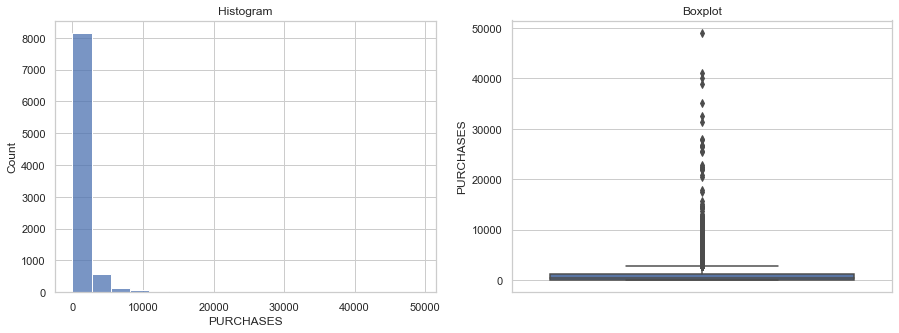

ONEOFF_PURCHASES
Distribution: 10.04165025657798
Kurtosis: 164.05442152588157


Highly Skewed


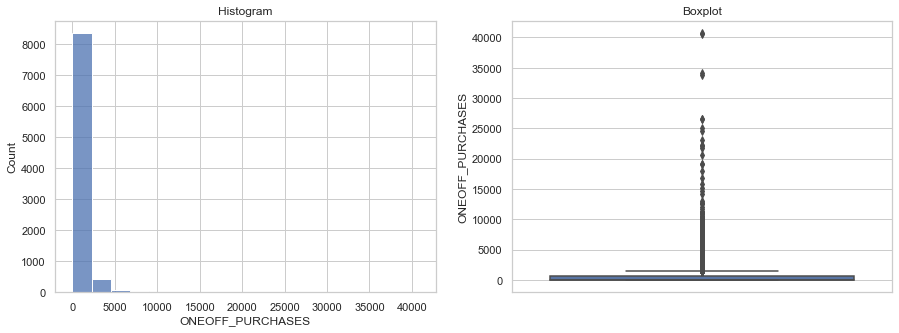

INSTALLMENTS_PURCHASES
Distribution: 7.310901006582314
Kurtosis: 96.81352368308411


Highly Skewed


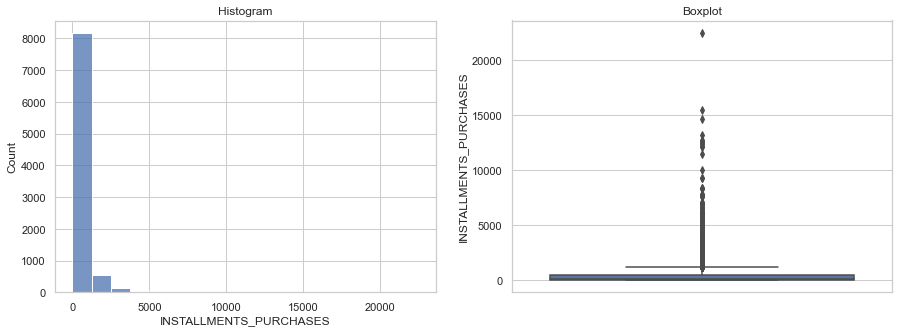

CASH_ADVANCE
Distribution: 5.1643538132604885
Kurtosis: 52.853437408146334


Highly Skewed


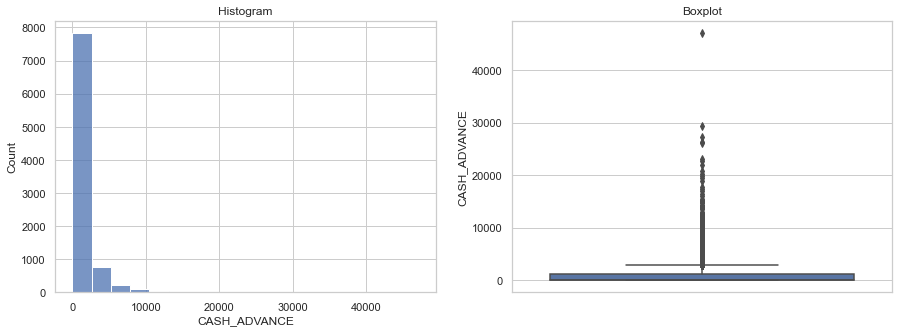

CASH_ADVANCE_TRX
Distribution: 5.718942785875184
Kurtosis: 61.59419003793574


Highly Skewed


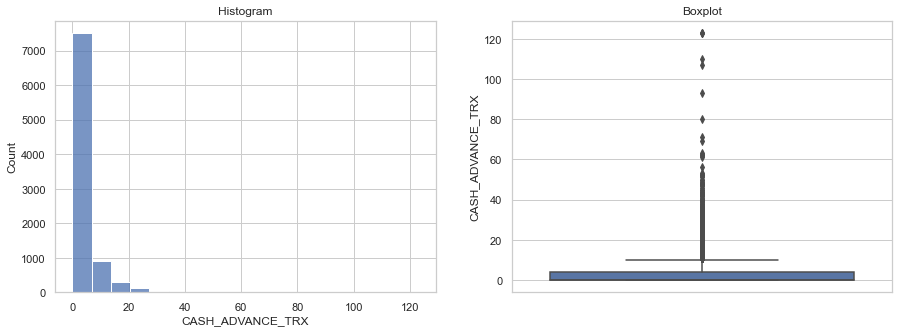

PURCHASES_TRX
Distribution: 4.6368181332471705
Kurtosis: 34.930543645161805


Highly Skewed


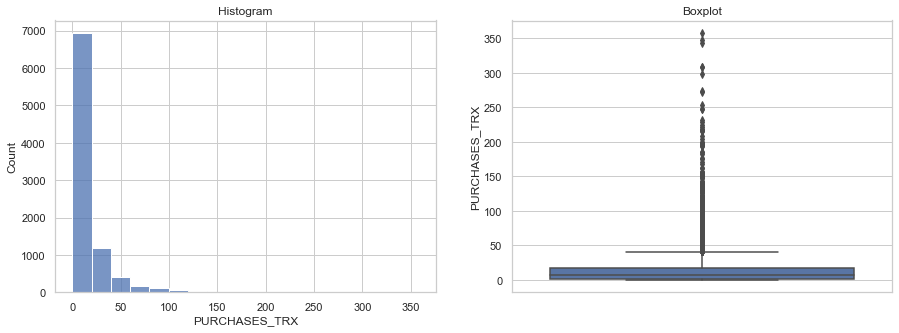

CREDIT_LIMIT
Distribution: 1.5214735366170815
Kurtosis: 2.8317632640588717


Highly Skewed


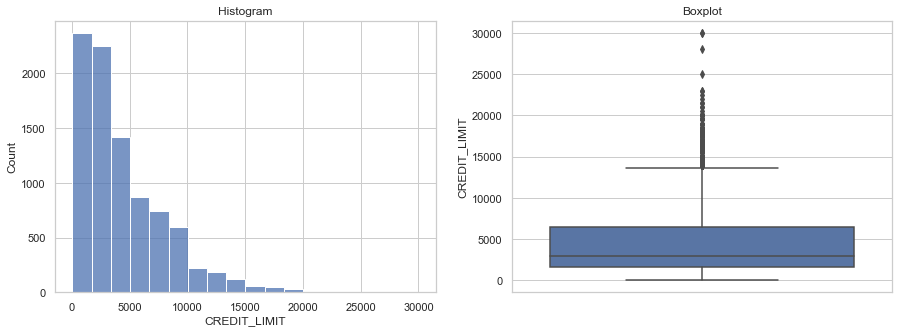

PAYMENTS
Distribution: 5.9066614212080895
Kurtosis: 54.740646841893096


Highly Skewed


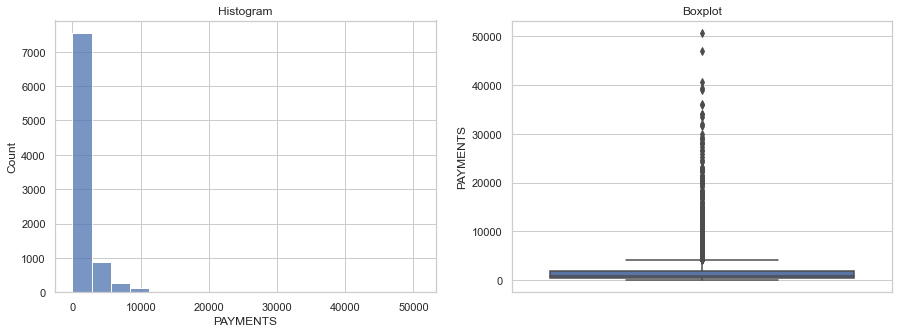

MINIMUM_PAYMENTS
Distribution: 13.616335821166084
Kurtosis: 283.7159907333881


Highly Skewed


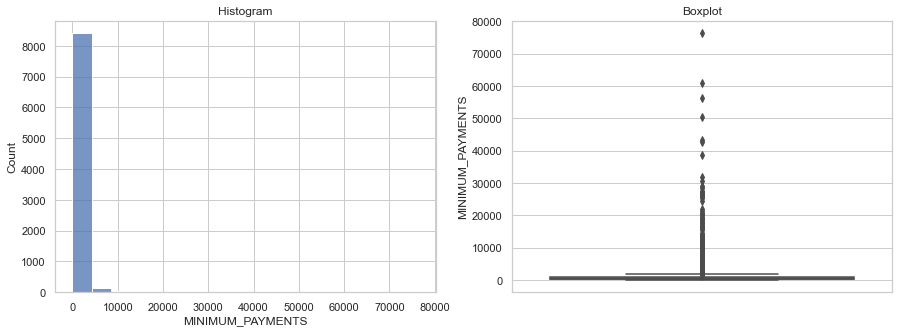

PRC_FULL_PAYMENT
Distribution: 1.9449985008523898
Kurtosis: 2.4425887596229834


Highly Skewed


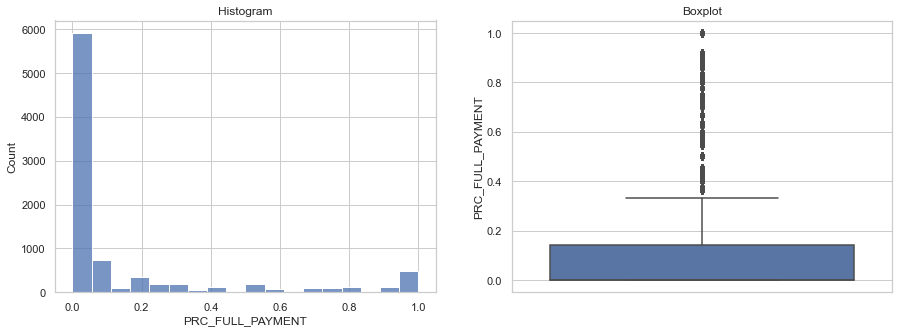

In [ ]:
distribution_features(data_train, num_train)

Jika kita lihat berdasarkan distribusinya, Semua Kolom benar memiliki Distribusi Skew. artinya memang terdapat kolom yang value rangenya mempunyai perbedaan yang cukup tinggi. 

Karena dataset yang kita gunakan memiliki record dari Karakteristik seseorang, yang dimana tiap orang itu bisa berbeda, maka bisa diasumsikan semua record yang ada bersifat Unique dan jangan di drop. 
Sehingga akan kita berlakukan metode Capping sebagai cara untuk menghandling outlier.

---

#### **Capping Method**

In [ ]:
data_train

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8936,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8937,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8938,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
capping = Winsorizer(capping_method='iqr', 
                     tail='both',
                     fold=1.5,
                     variables=num_train,
                     missing_values='ignore')

data_train = capping.fit_transform(data_train)


BALANCE
Distribution: 1.1667614007900788
Kurtosis: 0.19860267871461268


Highly Skewed


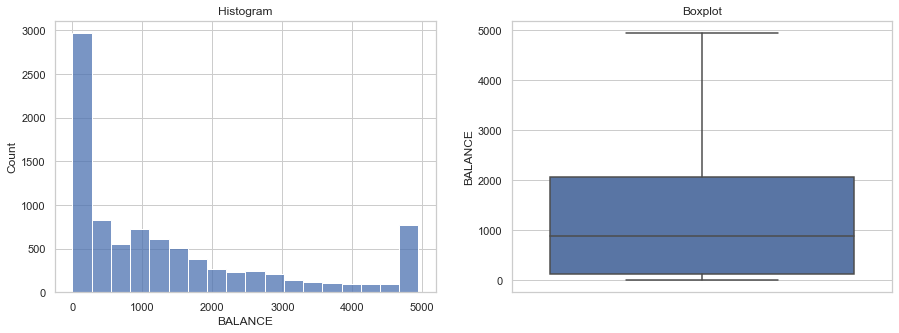

PURCHASES
Distribution: 1.2061613491193346
Kurtosis: 0.15434270405892603


Highly Skewed


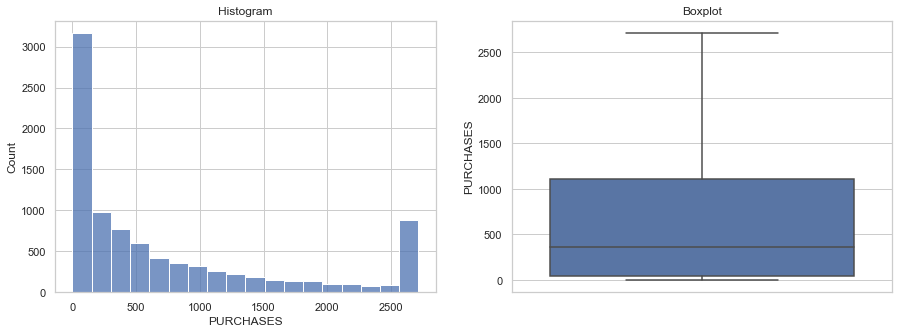

ONEOFF_PURCHASES
Distribution: 1.2376333855095967
Kurtosis: -0.024955144139059637


Highly Skewed


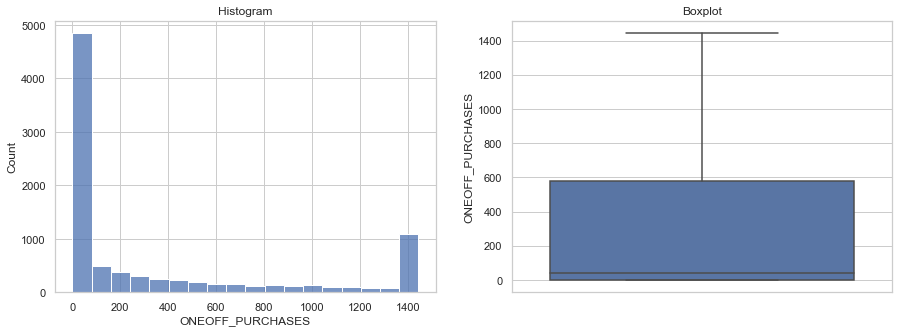

INSTALLMENTS_PURCHASES
Distribution: 1.2172592117819492
Kurtosis: 0.09241364464802526


Highly Skewed


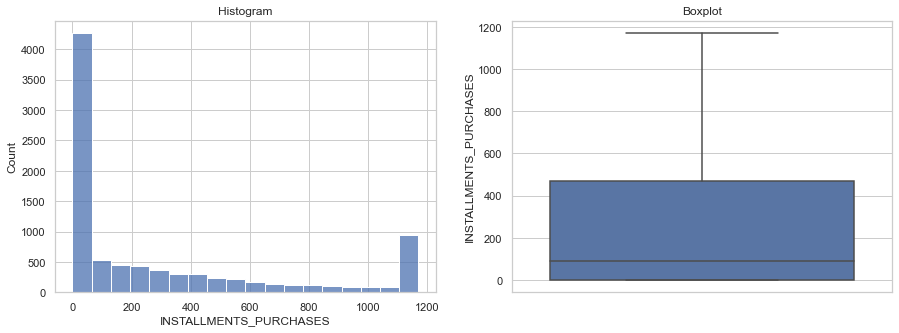

CASH_ADVANCE
Distribution: 1.2409793063139336
Kurtosis: -0.04462316154893875


Highly Skewed


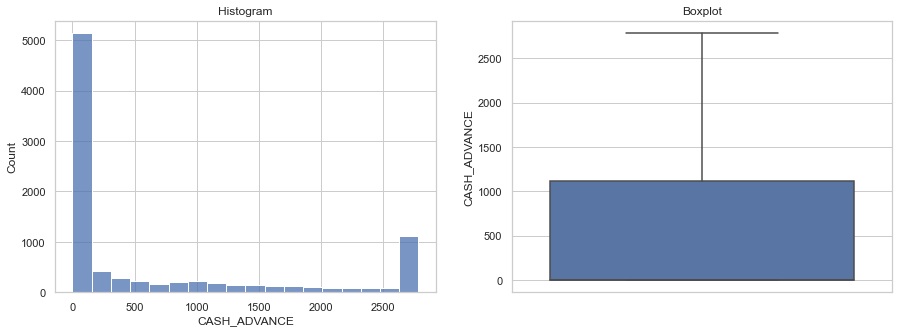

CASH_ADVANCE_TRX
Distribution: 1.281389562513442
Kurtosis: 0.19116201495630847


Highly Skewed


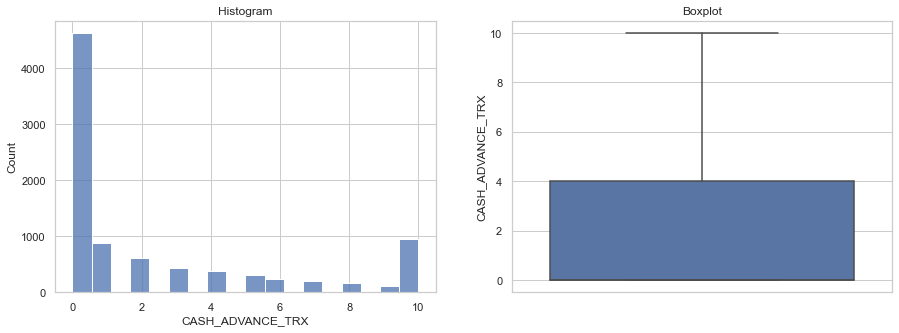

PURCHASES_TRX
Distribution: 1.139511587662871
Kurtosis: 0.10266512532400762


Highly Skewed


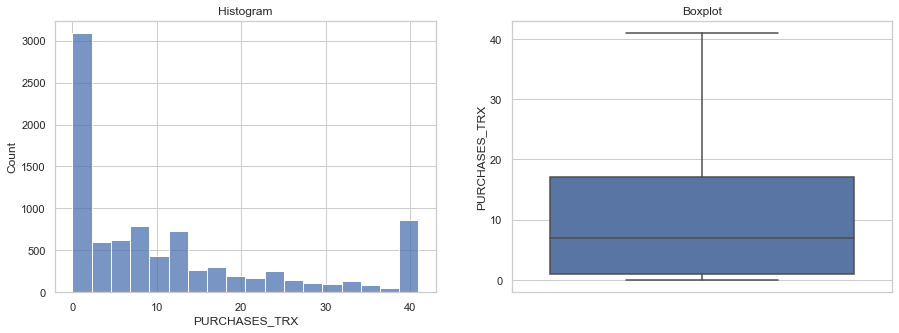

CREDIT_LIMIT
Distribution: 1.1012491172645262
Kurtosis: 0.4503181385559549


Highly Skewed


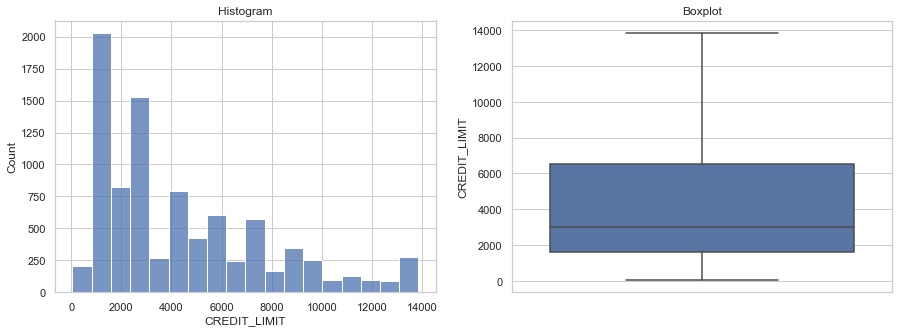

PAYMENTS
Distribution: 1.1302439262132602
Kurtosis: 0.069267054351418


Highly Skewed


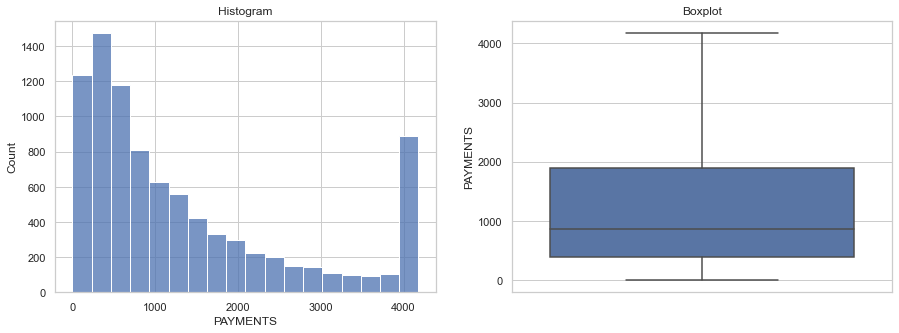

MINIMUM_PAYMENTS
Distribution: 1.182120451228471
Kurtosis: 0.056304080177496996


Highly Skewed


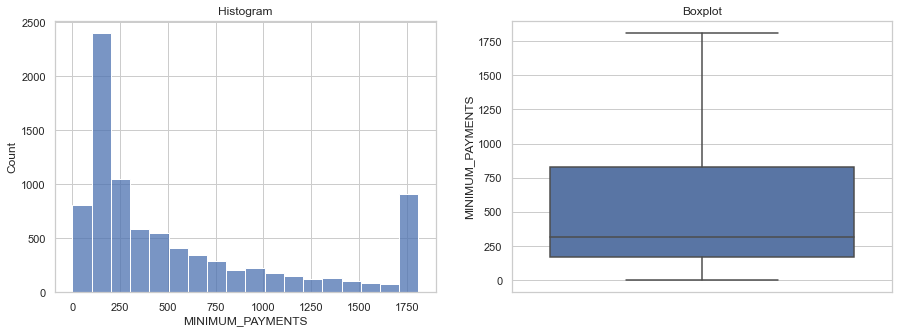

PRC_FULL_PAYMENT
Distribution: 1.212401701221331
Kurtosis: -0.2836934177057864


Highly Skewed


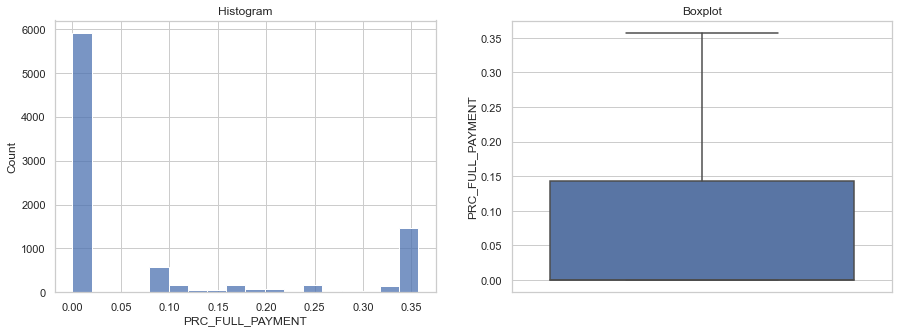

In [ ]:
distribution_features(data_train, num_train)

In [ ]:
data_train

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00000,0.00,2785.056824,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1444.71875,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,C19186,28.493517,1.000000,291.12,0.00000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.357143,6
8936,C19187,19.183215,1.000000,300.00,0.00000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,NaN,0.000000,6
8937,C19188,23.398673,0.833333,144.40,0.00000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6
8938,C19189,13.457564,0.833333,0.00,0.00000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6


#### **Missing Value**

**Kita akan bersihkan missing value dari data train set**

In [ ]:
data_train.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    312
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Apabila dilihat dari persebarannya, bisa kita asumsikan karena **CREDIT_LIMIT** memiliki nilai Missing Value yang jumlahnya sedikit, dan merupakan kolom yang Independent, kita akan *drop missing value* tersebut.

Sedangkan untuk **MINIMUM_PAYMENTS**, dapat di Asumsikan bahwa MINIMUM_PAYMENTS merupakan pembayaran minimum yang pernah dilakukan, artinya kolom ini bersifat Independent karena merupakan suatu kriteria yang tidak dapat dipengaruhi oleh Kolom/Feature yang lain. <br>
Untuk handling Missing Value pada kolom ini, karena kita tidak ingin mengubah nature dari data dengan menginputkan Mean/Median, kita akan isi *Missing Value dengan Value 0*

----

In [ ]:
data_train.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
data_train = data_train.fillna(0)

In [ ]:
data_train.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
data_train

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00000,0.00,2785.056824,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1444.71875,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,C19186,28.493517,1.000000,291.12,0.00000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.357143,6
8936,C19187,19.183215,1.000000,300.00,0.00000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,0.000000,0.000000,6
8937,C19188,23.398673,0.833333,144.40,0.00000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6
8938,C19189,13.457564,0.833333,0.00,0.00000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6


Data telah bersih dan siap untuk dilakukan preprocessing yang lain

---

In [ ]:
data_train.drop(columns=['CUST_ID'], inplace=True)

### **Feature Scalling**

**Agar tidak bias model machine learning kita, maka kita lakukan feature scalling**

In [ ]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
data_scalled = scaler.fit_transform(data_train)

In [ ]:
data_train = pd.DataFrame(data_scalled, columns=data_train.columns)

In [ ]:
data_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008273,0.818182,0.035127,0.000000,0.081410,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.068841,0.048285,0.077008,0.000000,1.0
1,0.647753,0.909091,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.166667,0.4,0.000000,0.503623,0.981733,0.591919,0.622222,1.0
2,0.504686,1.000000,0.284688,0.535170,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.292683,0.539855,0.148842,0.346254,0.000000,1.0
3,0.337112,0.636364,0.551946,1.000000,0.000000,0.073890,0.083333,0.083333,0.000000,0.055555,0.1,0.024390,0.539855,0.000000,0.000000,0.000000,1.0
4,0.165397,1.000000,0.005891,0.011075,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,0.024390,0.083333,0.162305,0.135122,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,0.005763,1.000000,0.107193,0.000000,0.248429,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.077905,0.026985,1.000000,0.0
8935,0.003880,1.000000,0.110463,0.000000,0.256007,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.066005,0.000000,0.000000,0.0
8936,0.004733,0.833333,0.053169,0.000000,0.123225,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,0.121951,0.068841,0.019446,0.045494,0.700001,0.0
8937,0.002722,0.833333,0.000000,0.000000,0.000000,0.013127,0.000000,0.000000,0.000000,0.111111,0.2,0.000000,0.032609,0.012574,0.030776,0.700001,0.0


---

### **Variance Inflation Factor** 

In [ ]:
vif_train = pd.DataFrame()
vif_train['feature'] = data_train.columns

# Calculate the VIF
vif_train['VIF'] = [variance_inflation_factor(data_train.values, i) for i in range(len(data_train.columns))]
vif_train.sort_values(by='VIF', ascending=False)

,feature,VIF
2,PURCHASES,27.498015
6,PURCHASES_FREQUENCY,26.470871
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.207002
3,ONEOFF_PURCHASES,14.829612
1,BALANCE_FREQUENCY,14.486453
16,TENURE,11.479205
11,PURCHASES_TRX,11.422604
4,INSTALLMENTS_PURCHASES,11.380733
10,CASH_ADVANCE_TRX,10.395823
0,BALANCE,9.908404


Nilai VIF menunjukkan bahwa dari 17 kolom tersebut, ada 7 kolom yang nilainya dibawah 5 dan 10 kolom yang nilainya diatas 5.

Berdasarkan VIF, dapat diketahui bahwa dari 17 kolom dapat direduksi hingga 10 kolom. Hal ini merupakan asumsi awal, untuk nilai pastinya harus dibuktikan dengan mengecek Cummulative EVR, serta grafik. 

---

### **Reduction Dimention (PCA)**

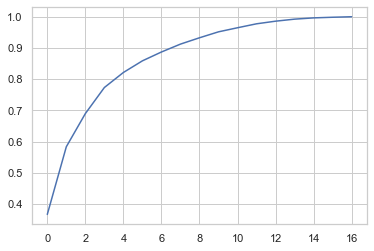

In [ ]:
pca=PCA(n_components=17).fit(data_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)
plt.show()

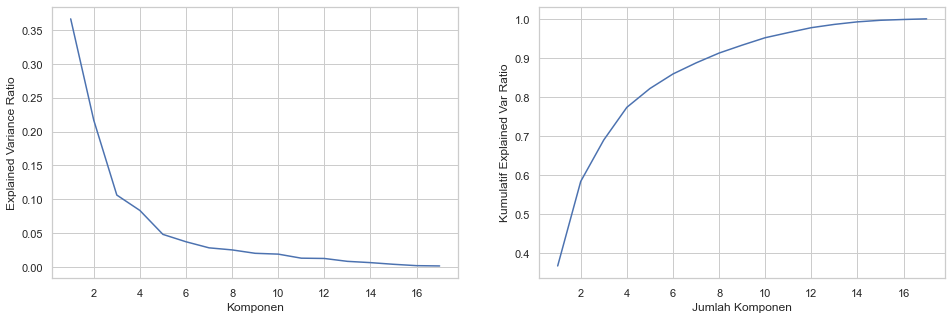

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

+ Degradasi Niai EVR Gradual dari komponen pertama hingga akhir 
+ Patahan terjadi pada Komponen ke 4, dengan Kumulatif EVR mendekati 80% kemungkinan terlihat cukup baik untuk digunakan, jumlah 7 komponen juga menarik karena Kumulatif EVR nya mendekati atau diatas 90% 

---

In [ ]:
np.sum(pca.explained_variance_ratio_)

1.0

In [ ]:
pca.n_components_

17

In [ ]:
pcaf = PCA(n_components=0.8).fit(data_train)
dotry = PCA(n_components=0.8).fit_transform(data_train)

In [ ]:
pcaf.n_components_

5

In [ ]:
np.sum(pcaf.explained_variance_ratio_)

0.8213361271459468

Kita set n_componenets sebesar 80% pada PCA, dari hasilnya dapatkan total **Komponen sebanyak 5**, dan dari 5 Komponen ini, mengangkut total informasi sebanyak **82%**.

---

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

### **Clustering**

#### **K-Means**

In [ ]:
kmeanf1 = KMeans(n_clusters=2)
kmeanf1.fit(dotry)

KMeans(n_clusters=2)

Deklarasi awal kmeans, untuk percobaan awal kita set 2 cluster 

---

In [ ]:
print(kmeanf1.labels_)
print(kmeanf1.inertia_)

[1 1 0 ... 0 1 0]
8472.59352878654


Cek labels dari K-Means dan Inertia nya, didapatkan hasil inertia sebesar 8472 

Inertia mengukur seberapa baik dataset di cluster oleh K-Means. hal ini dikalkulasi dengan cara mengukur jarak antar data point dengan centroidnya, kemudian di kuadratkan, dan ditambahkan antar tiap cluster.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

---

**Elbow Method**

Text(0, 0.5, 'Inertia')

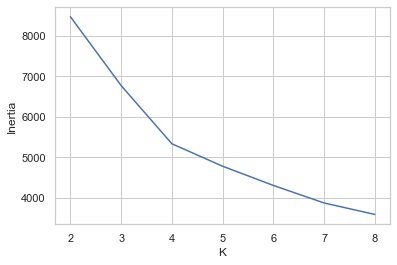

In [ ]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(dotry).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Jika kita perhatikan, **patahan terjadi pada K = 4** 

Asumsi awal adalah, kita akan menggunakan **Jumlah Cluster** sebanyak **4** Kelompok

---

**Silhouette Method**

Text(0, 0.5, 'Silhouette Score')

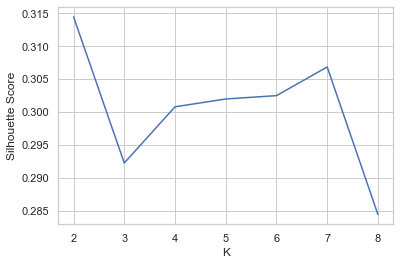

In [ ]:
#cek silhouette score

K=[2,3,4,5,6,7,8]
s_score=[silhouette_score(dotry, KMeans(n_clusters=i).fit(dotry).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Silhoutte Score mengukur seberapa mirip tiap data dengan Clusternya(cohesion) yang dibandingkan dengan Cluster lainnya(Separation). 

Range dari Silhouette Score diukur dari jarak -1 sampai dengan 1, dimana hasil tertinggi(mendekati 1) artinya menunjukan bahwa suatu data cocok dengan Clusternya dan perbandingan dengan Cluster lainnya tidak menunjukan kecocokan. 

**EN version** <br>
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

---

**Plotting from Silhouette Score**

In [ ]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=36)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.31449793553958355
For n_clusters = 3 The average silhouette_score is : 0.29229234182972375
For n_clusters = 4 The average silhouette_score is : 0.30062159373354724
For n_clusters = 5 The average silhouette_score is : 0.3019939217850296
For n_clusters = 6 The average silhouette_score is : 0.3037264404672041
For n_clusters = 7 The average silhouette_score is : 0.3068495312328377
For n_clusters = 8 The average silhouette_score is : 0.28440698282335625


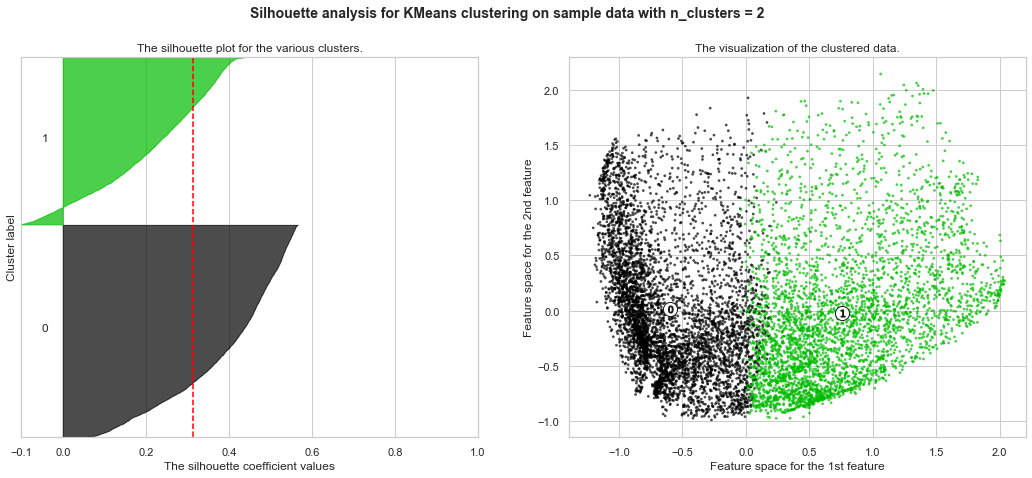

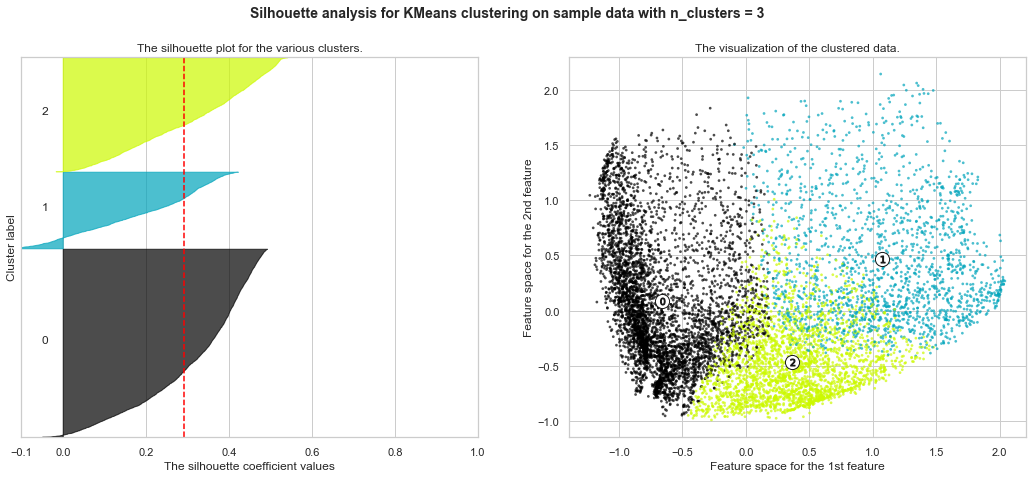

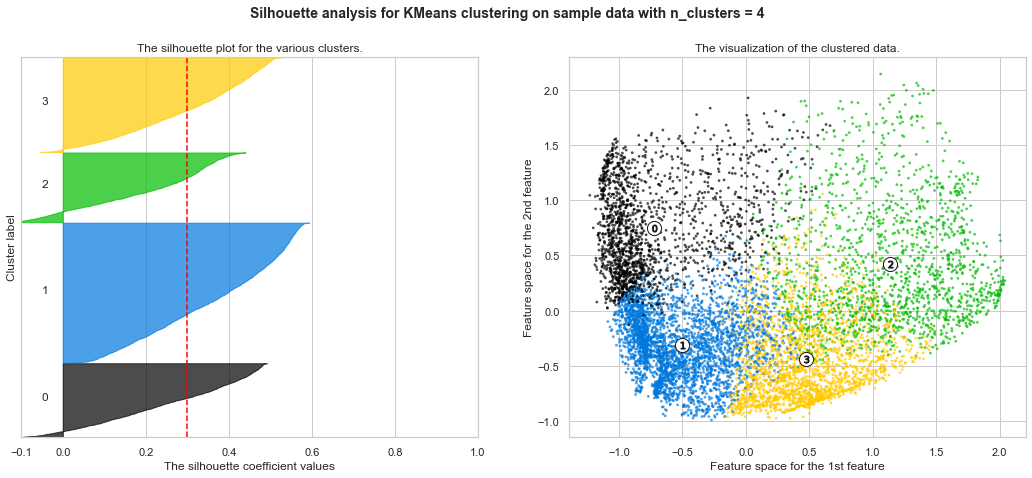

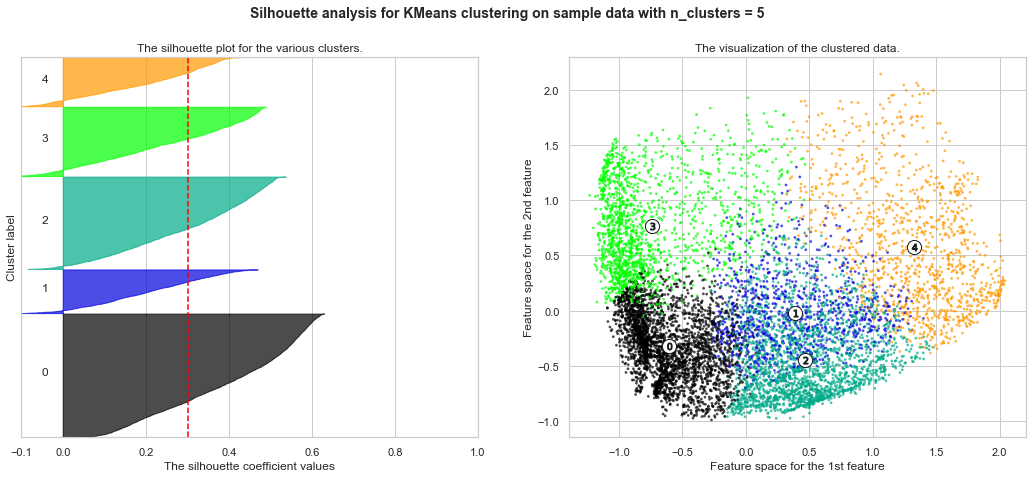

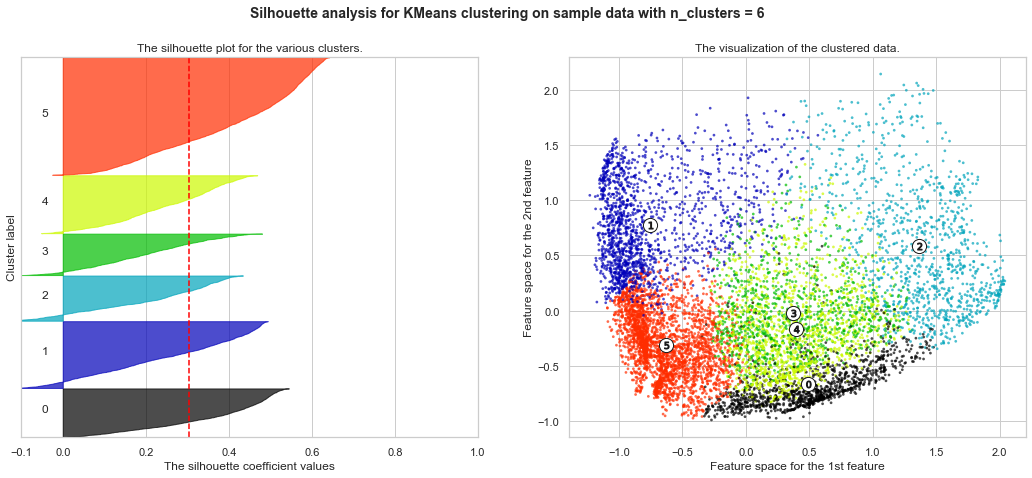

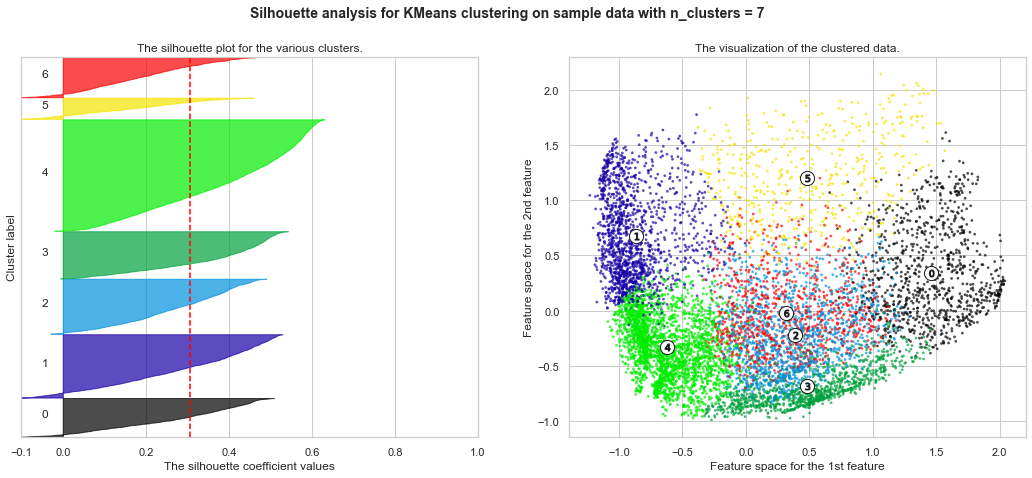

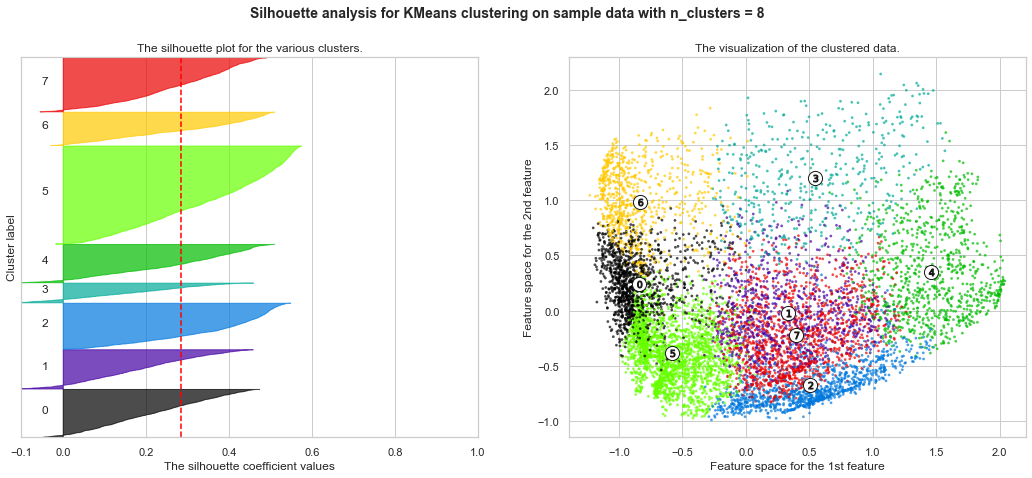

In [ ]:
plot_silhouette(K,dotry)

Dari hasil perhitungan Silhouette Score, didapatkan hasil : 
+ For n_clusters = 2 The average silhouette_score is : 0.31449793553958355
+ For n_clusters = 3 The average silhouette_score is : 0.29229234182972375
+ For n_clusters = 4 The average silhouette_score is : 0.30062159373354724
+ For n_clusters = 5 The average silhouette_score is : 0.3019939217850296
+ For n_clusters = 6 The average silhouette_score is : 0.3037264404672041
+ For n_clusters = 7 The average silhouette_score is : 0.3068495312328377
+ For n_clusters = 8 The average silhouette_score is : 0.28440698282335625

Jika dilihat dari nilai scorenya, **2 Cluster** menunjukan hasil score terbaik diantara jumlah Cluster yang lain, jika kita mau, maka bisa kita gunakan **2 Cluster** sebagai n_component yang akan kita pakai pada model K-Means yang akan kita gunakan. 

---

#### **GMM** 

In [ ]:
dotry_reduc = scaler.fit_transform(np.append(dotry,data_train,axis=1))

In [ ]:
gm = GaussianMixture(n_components=2, random_state=36)
gmf = gm.fit(dotry)

In [ ]:
gmp = gm.predict(dotry)

In [ ]:
pd.DataFrame(gmp)

,0
0,1
1,1
2,1
3,1
4,0
...,...
8934,1
8935,1
8936,1
8937,1


# 8. Model Training

**Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.**

---

Clustering dengan KMeans dimana datanya adalah hasil PCA. dan hasil analisa dari Elbow & Silhouette Method 

In [ ]:
kmean = KMeans(n_clusters=2)
kmeanc1 = kmean.fit_transform(dotry)
labels = kmean.labels_

In [ ]:
cluster_km = pd.DataFrame(kmeanc1)
cluster_km

,0,1
0,0.703152,1.522024
1,1.155396,1.945383
2,1.205760,1.034549
3,0.902766,1.421515
4,0.589654,1.560956
...,...,...
8934,1.569534,1.177156
8935,1.390863,1.168174
8936,1.287942,1.189854
8937,0.923966,1.726205


# 9. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

---

**Visualisasi Cluster**

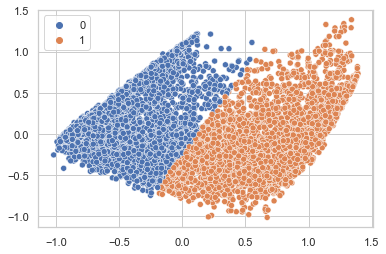

In [ ]:
pca1 = PCA(n_components=2).fit_transform(cluster_km)


sns.scatterplot(x=pca1[:,0], y=pca1[:,1], hue=labels)
plt.show()

Pada bagian ini, belum kita tentukan kriteria dari tiap Clusternya. kita akan analisa berdasarkan EDA 

---

**EDA Hasil Cluster**

In [ ]:
clusters = pd.concat([data_train, pd.DataFrame({'cluster':labels})], axis=1)

In [ ]:
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.008273,0.818182,0.035127,0.000000,0.081410,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.068841,0.048285,0.077008,0.000000,1.0,0
1,0.647753,0.909091,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.166667,0.4,0.000000,0.503623,0.981733,0.591919,0.622222,1.0,0
2,0.504686,1.000000,0.284688,0.535170,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.292683,0.539855,0.148842,0.346254,0.000000,1.0,1
3,0.337112,0.636364,0.551946,1.000000,0.000000,0.073890,0.083333,0.083333,0.000000,0.055555,0.1,0.024390,0.539855,0.000000,0.000000,0.000000,1.0,0
4,0.165397,1.000000,0.005891,0.011075,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,0.024390,0.083333,0.162305,0.135122,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,0.005763,1.000000,0.107193,0.000000,0.248429,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.077905,0.026985,1.000000,0.0,1
8935,0.003880,1.000000,0.110463,0.000000,0.256007,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.066005,0.000000,0.000000,0.0,1
8936,0.004733,0.833333,0.053169,0.000000,0.123225,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,0.121951,0.068841,0.019446,0.045494,0.700001,0.0,1
8937,0.002722,0.833333,0.000000,0.000000,0.000000,0.013127,0.000000,0.000000,0.000000,0.111111,0.2,0.000000,0.032609,0.012574,0.030776,0.700001,0.0,0


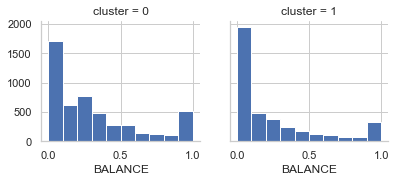

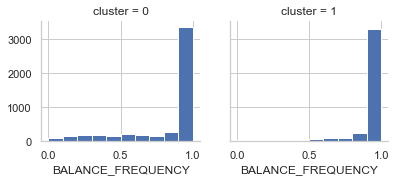

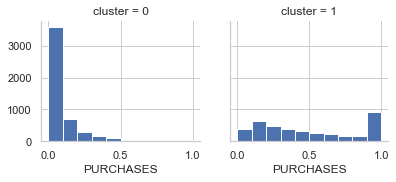

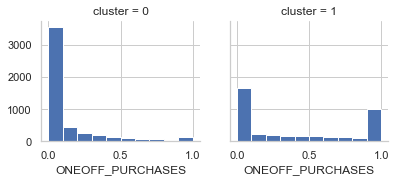

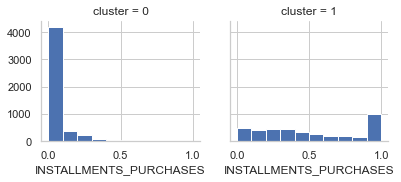

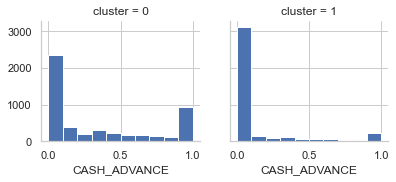

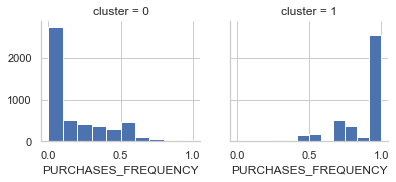

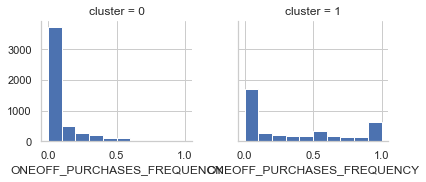

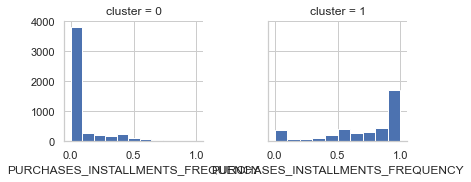

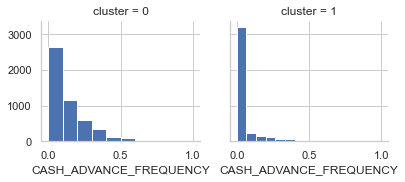

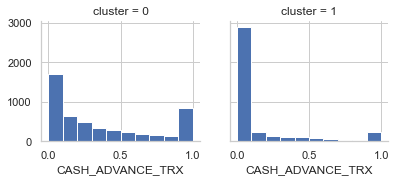

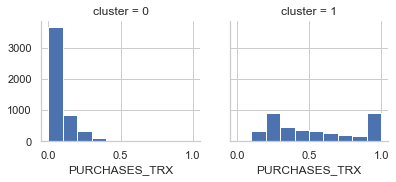

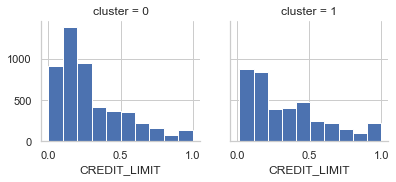

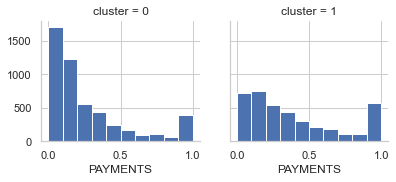

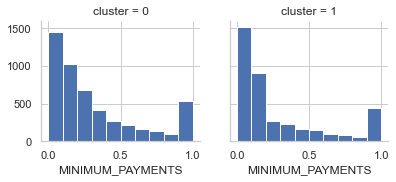

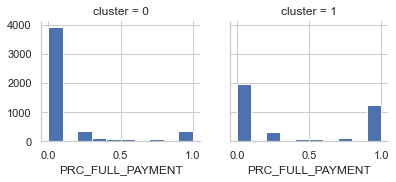

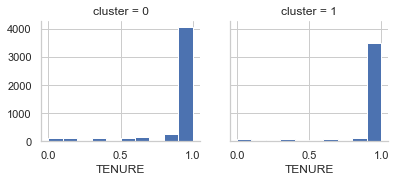

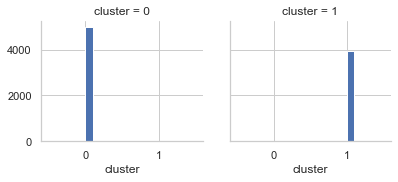

In [ ]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    grid.tight_layout(pad=2.0)

Kita akan lihat perbedaan Clusternya di tiap Feature yang memiliki perbedaan cukup signifikan 

**Balance** <br>
cluster 0 memiliki jumlah data dengan balance lebih besar dibandingkan 1 

**Purchases** <br>
Cluster 0 cenderung tidak melakukan purchase, cluster 1 lebih sering melakukan purchase 

**OneOffpurchase** <br>
Cluster 0 cenderung tidak melakukan oneoffpurchase, cluster 1 lebih sering melakukan OneOffpurchase

**InstallmentsPurchase** <br>
Cluster 0 cenderung tidak melakukan InstallmentsPurchase, cluster 1 lebih sering melakukan InstallmentsPurchase 

**CashAdvance** <br>
Cluster 0 lebih cenderung melakukan CashAdvance dibandingkan dengan Cluster 1 

**PurchaseFrequency**<br>
Cluster 0 cenderung memiliki purchase frequency yang lebih rendah dibandingkan Cluster 1 

**OneOffPurchaseFrequency**<br>
Cluster 0 cenderung tidak melakukan OneOffPurchaseFrequency, cluster 1 lebih sering melakukan OneOffPurchaseFrequency

**CreditLimits**<br>
Cluster 0 Memiliki Minimum variance credit limit yang lebih banyak, sedangkan Cluster 1 memiliki Maximum variance Credit Limit yang paling Besar 

**Payments**<br>
Cluster 0 cenderung tidak melakukan Payments, cluster 1 lebih sering melakukan Payments




Melihat dari hasil clusteringnya bisa disimpulkan bahwa :

**Cluster 0 = Who Saving** 

**Cluster 1 = Who Frequently Using** 


----

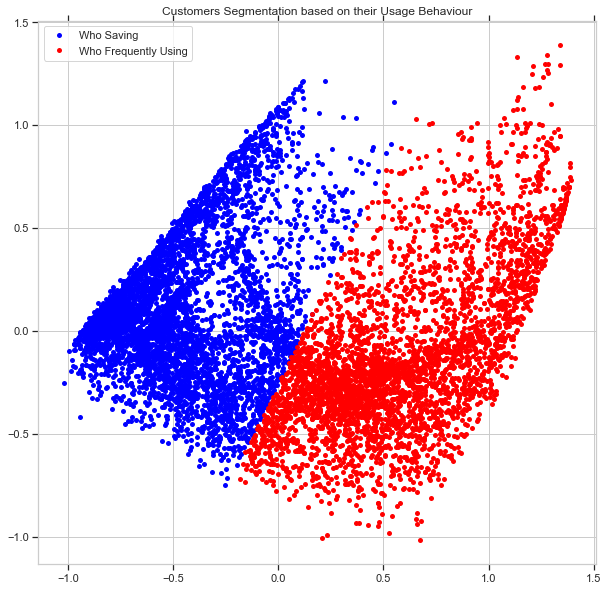

In [ ]:
X1, y = pca1[:, 0], pca1[:, 1]

colors = {0: 'blue',
          1: 'red'
          }


segmen = {0: 'Who Saving',
          1: 'Who Frequently Using'
          }

data_cluster = pd.DataFrame({'x': X1, 'y':y, 'label':labels}) 
groups = data_cluster.groupby('label')

fgicluster, axc = plt.subplots(figsize=(10,10))

for name, group in groups:
    axc.plot(group.x, group.y, marker='o', linestyle='', ms=5,
             color=colors[name],label=segmen[name], mec='none')
    axc.set_aspect('auto')
    axc.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    axc.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')



axc.legend()
axc.set_title("Customers Segmentation based on their Usage Behaviour")
plt.show()

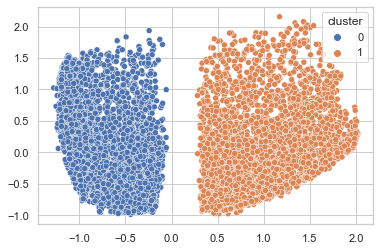

In [ ]:
pca1 = PCA(n_components=2).fit_transform(clusters)
sns.scatterplot(x=pca1[:,0], y=pca1[:,1], hue=clusters['cluster'])
plt.show()

---

# 10. Model Inference 

**Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.**

----

In [ ]:
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10049,3910.111237,1.000000,0.00,0.00,0.00,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.000000,12
1,C18676,231.422388,0.875000,822.93,822.93,0.00,0.000000,0.375000,0.375000,0.000000,0.000000,0,12,1200.0,120.912757,122.220568,0.000000,8
2,C16917,895.308285,1.000000,0.00,0.00,0.00,59.226322,0.000000,0.000000,0.000000,0.166667,2,0,1000.0,304.932110,272.538590,0.000000,12
3,C14034,2450.104201,1.000000,0.00,0.00,0.00,657.525213,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,692.953519,606.926044,0.000000,12
4,C16256,11.567196,0.454545,116.97,0.00,116.97,0.000000,0.250000,0.000000,0.250000,0.000000,0,6,2500.0,387.714131,140.215460,0.333333,12
5,C12344,1301.549278,1.000000,0.00,0.00,0.00,72.681585,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,317.211622,531.398722,0.000000,12
6,C11096,160.852061,0.888889,4704.98,2017.22,2687.76,0.000000,0.888889,0.666667,0.777778,0.000000,0,45,4500.0,4372.542801,129.801874,0.833333,9
7,C16674,382.979758,1.000000,3487.08,484.59,3002.49,0.000000,1.000000,0.333333,1.000000,0.000000,0,143,6000.0,3652.818025,174.214771,0.916667,12
8,C14385,19.548437,0.727273,266.56,84.00,182.56,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,4500.0,395.242487,199.880942,0.857143,12
9,C17217,1779.796624,1.000000,50.37,0.00,50.37,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,2000.0,578.775786,391.941294,0.000000,12


In [ ]:
data_inf = data_inf.fillna(0)

In [ ]:
data_inf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
data_inf.drop(columns=['CUST_ID'], inplace=True)

In [ ]:
data_inf_scalled = scaler.fit_transform(data_inf)
data_inf_scalled

array([[1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.64      , 0.        , 0.        ,
        0.        , 1.        ],
       [0.05639418, 0.77083352, 0.17490616, 0.40795253, 0.        ,
        0.        , 0.375     , 0.56249972, 0.        , 0.        ,
        0.        , 0.08391608, 0.04      , 0.02765273, 0.20137638,
        0.        , 0.        ],
       [0.22668491, 1.        , 0.        , 0.        , 0.        ,
        0.0298991 , 0.        , 0.        , 0.        , 0.333334  ,
        0.28571429, 0.        , 0.        , 0.06973794, 0.44904745,
        0.        , 1.        ],
       [0.62549941, 1.        , 0.        , 0.        , 0.        ,
        0.33193705, 0.        , 0.        , 0.        , 0.166666  ,
        0.14285714, 0.        , 0.4       , 0.15847838, 1.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.02486089, 0.      

In [ ]:
data_inf_final = pd.DataFrame(data_inf_scalled, columns=data_inf.columns)
data_inf_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.64,0.000000,0.000000,0.000000,1.00
1,0.056394,0.770834,0.174906,0.407953,0.000000,0.000000,0.375000,0.562500,0.000000,0.000000,0.000000,0.083916,0.04,0.027653,0.201376,0.000000,0.00
2,0.226685,1.000000,0.000000,0.000000,0.000000,0.029899,0.000000,0.000000,0.000000,0.333334,0.285714,0.000000,0.00,0.069738,0.449047,0.000000,1.00
3,0.625499,1.000000,0.000000,0.000000,0.000000,0.331937,0.000000,0.000000,0.000000,0.166666,0.142857,0.000000,0.40,0.158478,1.000000,0.000000,1.00
4,0.000000,0.000000,0.024861,0.000000,0.038958,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.041958,0.30,0.088670,0.231026,0.363636,1.00
5,0.330888,1.000000,0.000000,0.000000,0.000000,0.036692,0.000000,0.000000,0.000000,0.166666,0.142857,0.000000,0.10,0.072546,0.875558,0.000000,1.00
6,0.038292,0.796297,1.000000,1.000000,0.895177,0.000000,0.888889,1.000000,0.777778,0.000000,0.000000,0.314685,0.70,1.000000,0.213868,0.909090,0.25
7,0.095270,1.000000,0.741147,0.240227,1.000000,0.000000,1.000000,0.499999,1.000000,0.000000,0.000000,1.000000,1.00,0.835399,0.287044,1.000000,1.00
8,0.002047,0.500001,0.056655,0.041641,0.060803,0.000000,0.666667,0.124999,0.583333,0.000000,0.000000,0.062937,0.70,0.090392,0.329333,0.935065,1.00
9,0.453561,1.000000,0.010706,0.000000,0.016776,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.020979,0.20,0.132366,0.645781,0.000000,1.00


In [ ]:
kmean = KMeans(n_clusters=2).fit(data_train)
labels = kmean.labels_

In [ ]:
data_inf_final_cluster = kmean.fit(data_inf_final)
labels_inf = data_inf_final_cluster.labels_

In [ ]:
clusters_inf = pd.concat([data_inf_final, pd.DataFrame({'cluster':labels_inf})], axis=1)

In [ ]:
clusters_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.64,0.000000,0.000000,0.000000,1.00,0
1,0.056394,0.770834,0.174906,0.407953,0.000000,0.000000,0.375000,0.562500,0.000000,0.000000,0.000000,0.083916,0.04,0.027653,0.201376,0.000000,0.00,0
2,0.226685,1.000000,0.000000,0.000000,0.000000,0.029899,0.000000,0.000000,0.000000,0.333334,0.285714,0.000000,0.00,0.069738,0.449047,0.000000,1.00,0
3,0.625499,1.000000,0.000000,0.000000,0.000000,0.331937,0.000000,0.000000,0.000000,0.166666,0.142857,0.000000,0.40,0.158478,1.000000,0.000000,1.00,0
4,0.000000,0.000000,0.024861,0.000000,0.038958,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.041958,0.30,0.088670,0.231026,0.363636,1.00,0
5,0.330888,1.000000,0.000000,0.000000,0.000000,0.036692,0.000000,0.000000,0.000000,0.166666,0.142857,0.000000,0.10,0.072546,0.875558,0.000000,1.00,0
6,0.038292,0.796297,1.000000,1.000000,0.895177,0.000000,0.888889,1.000000,0.777778,0.000000,0.000000,0.314685,0.70,1.000000,0.213868,0.909090,0.25,1
7,0.095270,1.000000,0.741147,0.240227,1.000000,0.000000,1.000000,0.499999,1.000000,0.000000,0.000000,1.000000,1.00,0.835399,0.287044,1.000000,1.00,1
8,0.002047,0.500001,0.056655,0.041641,0.060803,0.000000,0.666667,0.124999,0.583333,0.000000,0.000000,0.062937,0.70,0.090392,0.329333,0.935065,1.00,0
9,0.453561,1.000000,0.010706,0.000000,0.016776,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.020979,0.20,0.132366,0.645781,0.000000,1.00,0


pca1 = PCA(n_components=2).fit_transform(cluster_km)


sns.scatterplot(x=pca1[:,0], y=pca1[:,1], hue=labels)
plt.show()

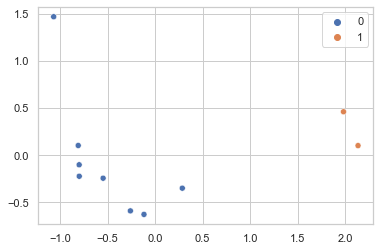

In [ ]:
pca_inf = PCA(n_components=2).fit_transform(clusters_inf)

sns.scatterplot(x=pca_inf[:,0], y=pca_inf[:,1], hue=labels_inf)
plt.show()

# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

----